In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [7]:
csv_file = "/Users/louis/Desktop/unit4_partially_processed.csv"
data = pd.read_csv(csv_file)
data.head()

,STATE,DOB,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW
0,IL,3712,XXXX,T2,NaN,H,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low


In [3]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,STATE,MDMAUD,DOMAIN,HOMEOWNR,RFA_2,IC2_NEW
0,IL,XXXX,T2,H,L4E,Low
1,CA,XXXX,S1,H,L2G,High
2,NC,XXXX,R2,H,L4E,Low
3,CA,XXXX,R2,H,L4E,Moderate
4,FL,XXXX,S2,H,L2F,Low


In [ ]:
data_corr = data['STATE', 'MDMAUD', 'HOMEOWNR', 'RFA_2', 'IC2_NEW']


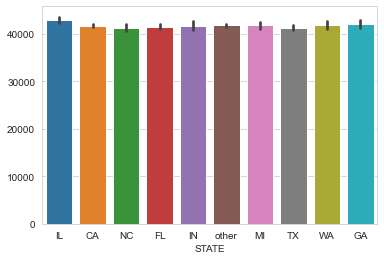

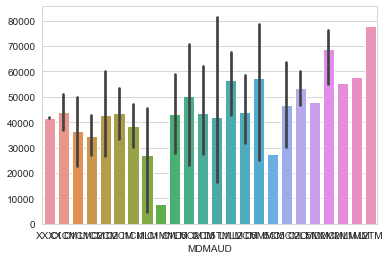

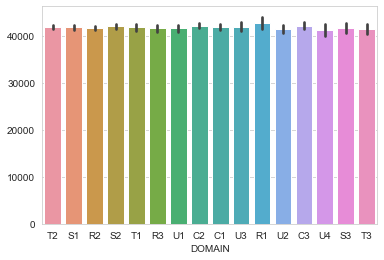

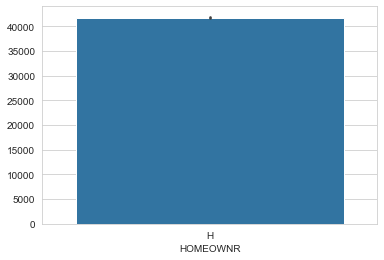

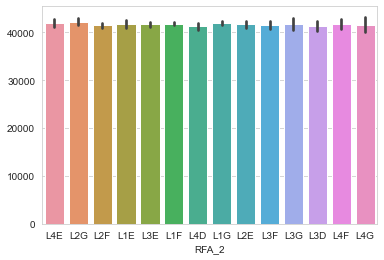

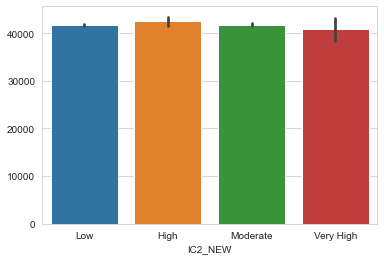

In [17]:
#Plot all the categorical variables with the proper plot
for col in categoricals:
    my_data = categoricals[col].value_counts()
    sns.barplot(x=col, y = categoricals.index, data=categoricals)
    plt.show()

# lab 2

In [18]:
# remove outliers 
data.describe()


,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
count,83568.000000,66815.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000,83568.000000
mean,2812.170316,3.879294,1051.382036,1122.038029,4.204289,3.858080,339.313086,386.190587,386.605519,429.904904,15669.582843,46.379571,18.247188,5.342667,12.773430,9701.727037,9.365451,1.822868,13.359283
std,2120.052487,1.855915,929.980199,936.028374,2.284011,2.227429,161.162419,171.797913,159.662617,169.987572,8467.422219,22.721881,8.550510,1.184366,4.356044,4.952410,8.404385,0.722251,9.122257
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9611.000000,1.000000,0.000000,1.285714
25%,801.000000,2.000000,510.000000,551.000000,3.000000,2.000000,231.000000,273.000000,277.000000,314.000000,10765.000000,27.000000,11.000000,5.000000,11.000000,9702.000000,3.000000,1.386294,8.500000
50%,2801.000000,4.000000,732.000000,796.000000,4.000000,3.000000,309.000000,355.000000,353.000000,396.000000,13680.000000,46.000000,18.000000,6.000000,12.000000,9702.000000,7.000000,1.825808,11.666667
75%,4601.000000,5.000000,1198.000000,1312.000000,5.000000,5.000000,413.000000,464.000000,464.000000,512.000000,18098.250000,63.000000,25.000000,6.000000,13.000000,9702.000000,13.000000,2.302585,15.625000
max,9710.000000,7.000000,6000.000000,6000.000000,13.000000,13.000000,1500.000000,1500.000000,1500.000000,1500.000000,159306.000000,194.000000,61.000000,19.000000,65.000000,9702.000000,237.000000,3.663562,506.500000


In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DOB         3800.000000
INCOME         3.000000
HV1          688.000000
HV2          761.000000
HV3            2.000000
HV4            3.000000
IC1          182.000000
IC2          191.000000
IC3          187.000000
IC4          198.000000
IC5         7333.250000
NUMPROM       36.000000
CARDPROM      14.000000
CARDPM12       1.000000
NUMPRM12       2.000000
MAXADATE       0.000000
NGIFTALL      10.000000
TIMELAG        0.916291
AVGGIFT        7.125000
dtype: float64


In [20]:
# if true means outliers 
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

       AVGGIFT  CARDPM12  CARDPROM    DOB  DOMAIN  HOMEOWNR    HV1    HV2  \
0        False     False     False  False   False     False  False  False   
1        False     False     False  False   False     False  False  False   
2        False     False     False  False   False     False  False  False   
3        False     False     False  False   False     False  False  False   
4        False     False     False  False   False     False  False  False   
...        ...       ...       ...    ...     ...       ...    ...    ...   
83563    False     False     False  False   False     False  False  False   
83564    False     False     False  False   False     False  False  False   
83565    False      True     False  False   False     False  False  False   
83566    False     False     False  False   False     False  False  False   
83567    False     False     False  False   False     False  False  False   

         HV3    HV4    IC1    IC2  IC2_NEW    IC3    IC4    IC5  INCOME  \


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [22]:
 #eleminate outliers with interquartile 
    data_out = data_2[~((data_2 < (Q1 - 1.5 * IQR)) |(data_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(55961, 25)


In [25]:
# create copy
data_2 = data_out

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83568 entries, 0 to 83567
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     83568 non-null  object 
 1   DOB       83568 non-null  int64  
 2   MDMAUD    83568 non-null  object 
 3   DOMAIN    83568 non-null  object 
 4   INCOME    66815 non-null  float64
 5   HOMEOWNR  83568 non-null  object 
 6   HV1       83568 non-null  int64  
 7   HV2       83568 non-null  int64  
 8   HV3       83568 non-null  int64  
 9   HV4       83568 non-null  int64  
 10  IC1       83568 non-null  int64  
 11  IC2       83568 non-null  int64  
 12  IC3       83568 non-null  int64  
 13  IC4       83568 non-null  int64  
 14  IC5       83568 non-null  int64  
 15  NUMPROM   83568 non-null  int64  
 16  CARDPROM  83568 non-null  int64  
 17  CARDPM12  83568 non-null  int64  
 18  NUMPRM12  83568 non-null  int64  
 19  MAXADATE  83568 non-null  int64  
 20  RFA_2     83568 non-null  ob

In [50]:
continuous_nna = data_2.dropna(axis=0,how='all')
continuous_nna = data_2.dropna(axis=1,how='any')

display(data_2.isna().sum())

#filling 0 with average of columns 
data_nna=data_nna.mask(data_nna==0).fillna(data_nna.mean())

print('shape before empty columns or rows:',continuous.shape)
print('shape after droping empty columns:',continuous_nna.shape)
print('shape after droping empty rows:',continuous_nna.shape) 
print("")

display(data_2.head())

STATE           0
DOB             0
MDMAUD          0
DOMAIN          0
INCOME      10165
HOMEOWNR        0
HV1             0
HV2             0
HV3             0
HV4             0
IC1             0
IC2             0
IC3             0
IC4             0
IC5             0
NUMPROM         0
CARDPROM        0
CARDPM12        0
NUMPRM12        0
MAXADATE        0
RFA_2           0
NGIFTALL        0
TIMELAG         0
AVGGIFT         0
IC2_NEW         0
dtype: int64

shape before empty columns or rows: (83568, 3)
shape after droping empty columns: (55961, 24)
shape after droping empty rows: (55961, 24)



,STATE,DOB,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW
2,NC,0,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
5,IN,6001,XXXX,T2,4.0,H,484,519,3,3,251,284,278,311,10717,63,26,4,9,9702,L1E,14,1.386294,7.642857,Low
6,other,0,XXXX,T2,2.0,H,702,787,3,3,367,457,431,466,14248,35,14,6,12,9702,L3E,5,1.791759,6.200000,Moderate
7,other,0,XXXX,R2,3.0,H,234,288,2,1,226,266,280,323,11127,70,29,6,12,9702,L1F,11,2.079442,18.090909,Low


         AVGGIFT   TIMELAG
2       7.481481  2.484907
3       6.812500  2.197225
5       7.642857  1.386294
6       6.200000  1.791759
7      18.090909  2.079442
...          ...       ...
83559   9.666667  2.302585
83560   9.750000  0.693147
83561   5.900000  1.098612
83563   3.375000  1.098612
83564  25.000000  1.825808

[55961 rows x 2 columns]


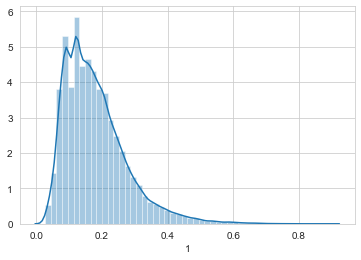

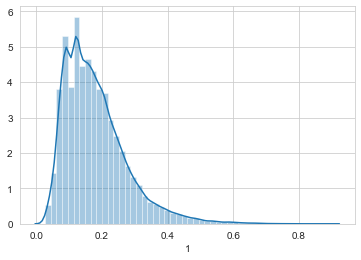

In [51]:
#Normalize the continuous variables. Continuous = can take any values

continuous_nna =  data_2[['AVGGIFT', 'TIMELAG']]
print(continuous_nna)

from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(continuous_nna)
x_norm = normalizer.transform(continuous_nna)
x_norm = pd.DataFrame(x_norm)

#then 

for i in x_norm.columns: 
    sns.distplot(x_norm[1])
    plt.show()

In [66]:
cat = categoricals.columns
x = [j for i in cat for j in categoricals[i].unique()[1:]]

In [67]:
#Encode the categorical variables
categoricals 
from sklearn.preprocessing import OneHotEncoder
encoder_cat = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded_cat =encoder.transform(categoricals).toarray()
pd.DataFrame(encoded, columns = x)


,CA,NC,FL,IN,other,MI,TX,WA,GA,C1CM,D1CM,L1CM,C2CM,D2CM,I1CM,I1LM,C1MM,C1LM,D5CM,I2CM,D5TM,L1LM,L2CM,D5MM,I5CM,C5CM,C2LM,C5MM,D2MM,C2MM,L1MM,L2TM,S1,R2,S2,T1,R3,U1,C2,C1,U3,R1,U2,C3,U4,S3,T3,L2G,L2F,L1E,L3E,L1F,L4D,L1G,L2E,L3F,L3G,L3D,L4F,L4G,High,Moderate,Very High
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83563,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
83564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
83565,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83566,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# transform time variable from obj to int

data.head()

,STATE,DOB,MDMAUD,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_NEW
0,IL,3712,XXXX,T2,NaN,H,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,1.386294,7.741935,Low
1,CA,5202,XXXX,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,2.890372,15.666667,High
2,NC,0,XXXX,R2,3.0,H,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,2.484907,7.481481,Low
3,CA,2801,XXXX,R2,1.0,H,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,2.197225,6.812500,Moderate
4,FL,2001,XXXX,S2,3.0,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,2.639057,6.864865,Low


In [58]:
#change timelag to int64

data = data.astype({"TIMELAG": int})

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83568 entries, 0 to 83567
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STATE     83568 non-null  object 
 1   DOB       83568 non-null  int64  
 2   MDMAUD    83568 non-null  object 
 3   DOMAIN    83568 non-null  object 
 4   INCOME    66815 non-null  float64
 5   HOMEOWNR  83568 non-null  object 
 6   HV1       83568 non-null  int64  
 7   HV2       83568 non-null  int64  
 8   HV3       83568 non-null  int64  
 9   HV4       83568 non-null  int64  
 10  IC1       83568 non-null  int64  
 11  IC2       83568 non-null  int64  
 12  IC3       83568 non-null  int64  
 13  IC4       83568 non-null  int64  
 14  IC5       83568 non-null  int64  
 15  NUMPROM   83568 non-null  int64  
 16  CARDPROM  83568 non-null  int64  
 17  CARDPM12  83568 non-null  int64  
 18  NUMPRM12  83568 non-null  int64  
 19  MAXADATE  83568 non-null  int64  
 20  RFA_2     83568 non-null  ob

In [63]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83568 entries, 0 to 83567
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE     83568 non-null  object
 1   MDMAUD    83568 non-null  object
 2   DOMAIN    83568 non-null  object
 3   HOMEOWNR  83568 non-null  object
 4   RFA_2     83568 non-null  object
 5   IC2_NEW   83568 non-null  object
dtypes: object(6)
memory usage: 3.8+ MB
